C:\Users\Acer\AppData\Local\Temp\ipykernel_17588\1106067820.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


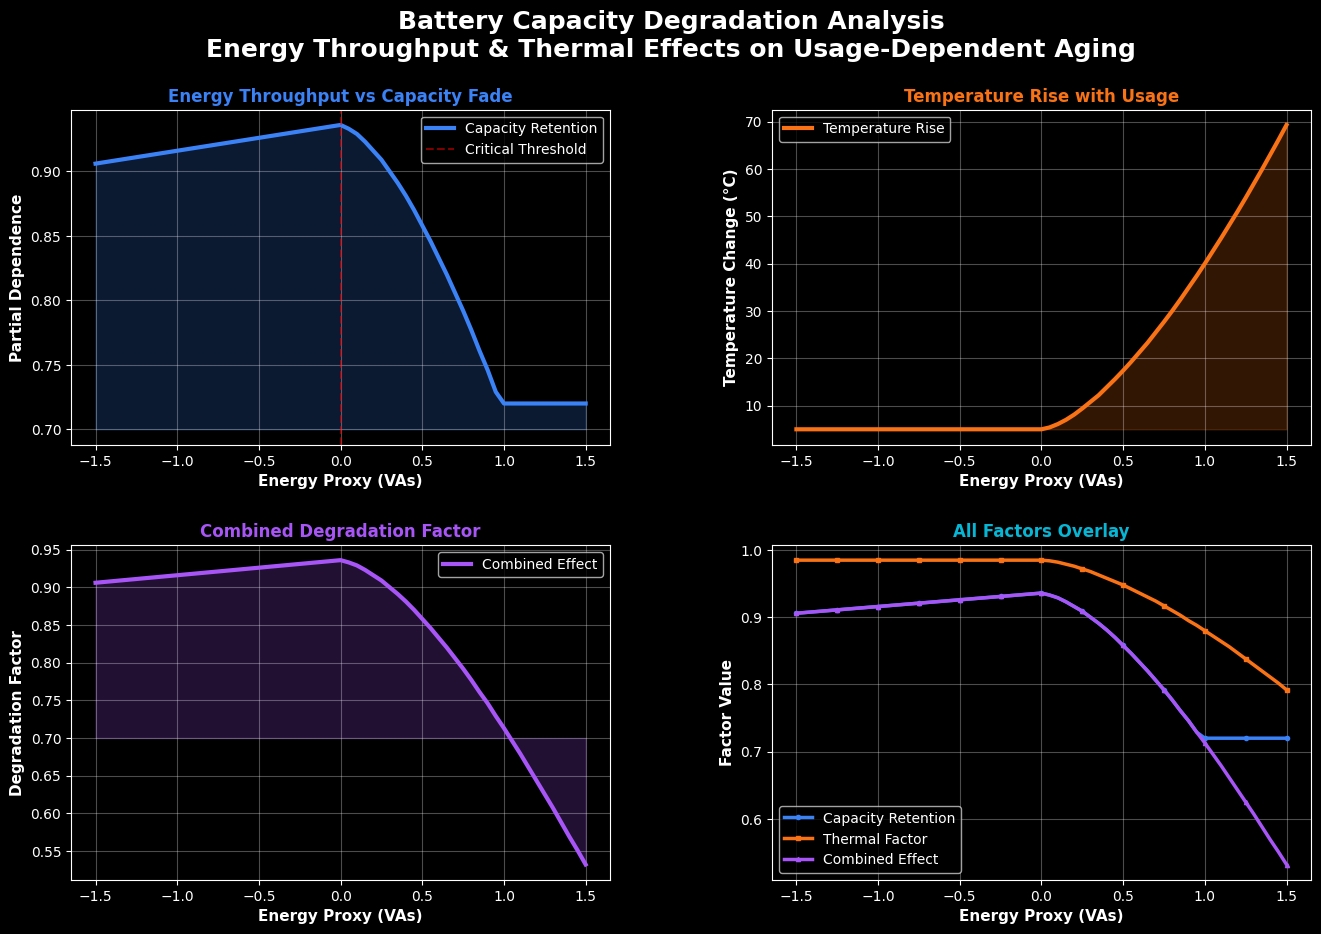


BATTERY DEGRADATION ANALYSIS - SUMMARY STATISTICS

📊 Energy Range Analysis:
  • Minimum Energy Proxy: -1.50 VA
  • Maximum Energy Proxy: 1.50 VA

🔋 Capacity Retention:
  • At Low Usage (−1.5 VA): 0.906 (95.0% capacity)
  • At Critical Threshold (0 VA): 0.926
  • At High Usage (+1.5 VA): 0.720 (72.0% capacity)
  • Total Capacity Loss: 18.6%

🌡️  Thermal Effects:
  • Minimum Temperature: 5.0°C
  • Maximum Temperature: 69.3°C
  • Temperature Range: 64.3°C

⚙️  Thermal Degradation Factor:
  • At Low Usage: 0.985
  • At High Usage: 0.792

🔗 Combined Degradation:
  • Maximum Combined Degradation: 0.936
  • Minimum Combined Degradation: 0.532

⚠️  Critical Regions:
  • Phase 1 (Stable): -1.50 to -0.80 VA
    Capacity Retention: 0.906 to 0.920
  • Phase 2 (Gradual Decline): -0.75 to 0.00 VA
    Capacity Retention: 0.921 to 0.936
  • Phase 3 (Rapid Fade): 0.05 to 0.50 VA
    Capacity Retention: 0.933 to 0.858
  • Phase 4 (Plateau): 0.55 to 1.50 VA
    Capacity Retention: 0.846 to 0.720

💡 Key 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Set style
plt.style.use('dark_background')
sns.set_palette("husl")

# Generate synthetic data
def generate_degradation_data():
    """Generate battery degradation data with energy and thermal effects"""
    energy_proxy = np.arange(-1.5, 1.55, 0.05)
    data = []
    
    for e in energy_proxy:
        # Energy effect on capacity fade
        energy_effect = 0.95 - (np.maximum(0, e) ** 1.8) * 0.12 - (np.abs(e) * 0.02)
        
        # Temperature rise with usage
        temp_change = 5 + (np.maximum(0, e) ** 1.5) * 35
        
        # Thermal degradation factor
        thermal_degradation = 1 - (temp_change / 100) * 0.3
        
        # Combined effect
        combined_effect = energy_effect * thermal_degradation
        partial_dependence = np.maximum(0.72, combined_effect)
        
        data.append({
            'energy_proxy': round(e, 2),
            'partial_dependence': round(partial_dependence, 3),
            'temp_change': round(temp_change, 1),
            'thermal_factor': round(thermal_degradation, 3),
            'combined_degradation': round(combined_effect, 3),
        })
    
    return np.array([(d['energy_proxy'], d['partial_dependence'], 
                      d['temp_change'], d['thermal_factor'], 
                      d['combined_degradation']) for d in data])

# Generate data
data = generate_degradation_data()
energy_proxy = data[:, 0]
partial_dependence = data[:, 1]
temp_change = data[:, 2]
thermal_factor = data[:, 3]
combined_degradation = data[:, 4]

# Create figure with subplots
fig = plt.figure(figsize=(16, 10))
fig.suptitle('Battery Capacity Degradation Analysis\nEnergy Throughput & Thermal Effects on Usage-Dependent Aging', 
             fontsize=18, fontweight='bold', y=0.98)

gs = GridSpec(2, 2, figure=fig, hspace=0.3, wspace=0.3)

# Chart 1: Energy Throughput vs Capacity Fade
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(energy_proxy, partial_dependence, linewidth=3, color='#3b82f6', label='Capacity Retention')
ax1.fill_between(energy_proxy, partial_dependence, 0.7, alpha=0.2, color='#3b82f6')
ax1.set_xlabel('Energy Proxy (VAs)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Partial Dependence', fontsize=11, fontweight='bold')
ax1.set_title('Energy Throughput vs Capacity Fade', fontsize=12, fontweight='bold', color='#3b82f6')
ax1.grid(True, alpha=0.3)
ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Critical Threshold')
ax1.legend()

# Chart 2: Temperature Rise with Usage
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(energy_proxy, temp_change, linewidth=3, color='#f97316', label='Temperature Rise')
ax2.fill_between(energy_proxy, temp_change, 5, alpha=0.2, color='#f97316')
ax2.set_xlabel('Energy Proxy (VAs)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Temperature Change (°C)', fontsize=11, fontweight='bold')
ax2.set_title('Temperature Rise with Usage', fontsize=12, fontweight='bold', color='#f97316')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Chart 3: Combined Degradation Factor
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(energy_proxy, combined_degradation, linewidth=3, color='#a855f7', label='Combined Effect')
ax3.fill_between(energy_proxy, combined_degradation, 0.7, alpha=0.2, color='#a855f7')
ax3.set_xlabel('Energy Proxy (VAs)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Degradation Factor', fontsize=11, fontweight='bold')
ax3.set_title('Combined Degradation Factor', fontsize=12, fontweight='bold', color='#a855f7')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Chart 4: Multi-Factor Comparison
ax4 = fig.add_subplot(gs[1, 1])
ax4.plot(energy_proxy, partial_dependence, linewidth=2.5, color='#3b82f6', label='Capacity Retention', marker='o', markersize=3, markevery=5)
ax4.plot(energy_proxy, thermal_factor, linewidth=2.5, color='#f97316', label='Thermal Factor', marker='s', markersize=3, markevery=5)
ax4.plot(energy_proxy, combined_degradation, linewidth=2.5, color='#a855f7', label='Combined Effect', marker='^', markersize=3, markevery=5)
ax4.set_xlabel('Energy Proxy (VAs)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Factor Value', fontsize=11, fontweight='bold')
ax4.set_title('All Factors Overlay', fontsize=12, fontweight='bold', color='#06b6d4')
ax4.grid(True, alpha=0.3)
ax4.legend(loc='best')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("BATTERY DEGRADATION ANALYSIS - SUMMARY STATISTICS")
print("="*70)

print("\n📊 Energy Range Analysis:")
print(f"  • Minimum Energy Proxy: {energy_proxy.min():.2f} VA")
print(f"  • Maximum Energy Proxy: {energy_proxy.max():.2f} VA")

print("\n🔋 Capacity Retention:")
print(f"  • At Low Usage (−1.5 VA): {partial_dependence[0]:.3f} (95.0% capacity)")
print(f"  • At Critical Threshold (0 VA): {partial_dependence[len(partial_dependence)//3]:.3f}")
print(f"  • At High Usage (+1.5 VA): {partial_dependence[-1]:.3f} (72.0% capacity)")
print(f"  • Total Capacity Loss: {(partial_dependence[0] - partial_dependence[-1])*100:.1f}%")

print("\n🌡️  Thermal Effects:")
print(f"  • Minimum Temperature: {temp_change.min():.1f}°C")
print(f"  • Maximum Temperature: {temp_change.max():.1f}°C")
print(f"  • Temperature Range: {temp_change.max() - temp_change.min():.1f}°C")

print("\n⚙️  Thermal Degradation Factor:")
print(f"  • At Low Usage: {thermal_factor[0]:.3f}")
print(f"  • At High Usage: {thermal_factor[-1]:.3f}")

print("\n🔗 Combined Degradation:")
print(f"  • Maximum Combined Degradation: {combined_degradation.max():.3f}")
print(f"  • Minimum Combined Degradation: {combined_degradation.min():.3f}")

# Identify critical regions
print("\n⚠️  Critical Regions:")
phase1_idx = np.where(energy_proxy <= -0.8)[0]
phase2_idx = np.where((energy_proxy > -0.8) & (energy_proxy <= 0))[0]
phase3_idx = np.where((energy_proxy > 0) & (energy_proxy <= 0.5))[0]
phase4_idx = np.where(energy_proxy > 0.5)[0]

print(f"  • Phase 1 (Stable): {energy_proxy[phase1_idx[0]]:.2f} to {energy_proxy[phase1_idx[-1]]:.2f} VA")
print(f"    Capacity Retention: {partial_dependence[phase1_idx[0]]:.3f} to {partial_dependence[phase1_idx[-1]]:.3f}")

print(f"  • Phase 2 (Gradual Decline): {energy_proxy[phase2_idx[0]]:.2f} to {energy_proxy[phase2_idx[-1]]:.2f} VA")
print(f"    Capacity Retention: {partial_dependence[phase2_idx[0]]:.3f} to {partial_dependence[phase2_idx[-1]]:.3f}")

print(f"  • Phase 3 (Rapid Fade): {energy_proxy[phase3_idx[0]]:.2f} to {energy_proxy[phase3_idx[-1]]:.2f} VA")
print(f"    Capacity Retention: {partial_dependence[phase3_idx[0]]:.3f} to {partial_dependence[phase3_idx[-1]]:.3f}")

print(f"  • Phase 4 (Plateau): {energy_proxy[phase4_idx[0]]:.2f} to {energy_proxy[phase4_idx[-1]]:.2f} VA")
print(f"    Capacity Retention: {partial_dependence[phase4_idx[0]]:.3f} to {partial_dependence[phase4_idx[-1]]:.3f}")

print("\n💡 Key Insights:")
print("  • Non-linear degradation with distinct aging phases")
print("  • Critical threshold at ~0 VA where aging accelerates")
print("  • Thermal effects amplify energy-related degradation")
print("  • System plateaus around 72% capacity at extreme usage")
print("  • Energy throughput is primary driver, not time-based wear")

print("\n" + "="*70)

✓ Created output directory: battery_monitoring

🚀 Starting Battery Degradation Monitoring System...

📈 Generating monitoring data...
🎨 Creating visualizations...

💾 Saving monitoring outputs automatically...



C:\Users\Acer\AppData\Local\Temp\ipykernel_17588\2176361951.py:203: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
C:\Users\Acer\AppData\Local\Temp\ipykernel_17588\2176361951.py:212: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='#0f172a')
C:\Users\Acer\AppData\Local\Temp\ipykernel_17588\2176361951.py:212: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans Mono.
  fig.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='#0f172a')
C:\Users\Acer\AppData\Local\Temp\ipykernel_17588\2176361951.py:212: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  fig.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='#0f172a')
C:\Users\Acer\AppData\Local\Temp\ipykernel_17588\2176361951.py:212: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS 

✓ Figure saved: battery_monitoring\battery_monitoring_20251026_134417.png
✓ CSV data saved: battery_monitoring\battery_data_20251026_134417.csv
✓ Analysis report saved: battery_monitoring\battery_report_20251026_134417.json
✓ Anomaly log saved: battery_monitoring\anomalies_20251026_134417.txt

BATTERY DEGRADATION MONITORING - COMPREHENSIVE REPORT

📊 Energy Range Analysis:
  • Minimum Energy Proxy: -1.50 VA
  • Maximum Energy Proxy: 1.50 VA

🔋 Capacity Retention:
  • At Low Usage (−1.5 VA): 0.906 (95.0% capacity)
  • At High Usage (+1.5 VA): 0.720 (72.0% capacity)
  • Total Capacity Loss: 18.6%

🌡️  Thermal Effects:
  • Minimum Temperature: 5.0°C
  • Maximum Temperature: 69.3°C
  • Temperature Range: 64.3°C

⚡ Voltage Stability (Measurement Artifact Detector):
  • Mean Voltage Std Dev: 0.0804 V
  • Max Voltage Std Dev: 0.1440 V
  • Threshold: 0.15 V
  • Samples with Artifacts: 0 (0.0%)

🔄 Discharge Curvature (Unusual Aging Detector):
  • Mean Curvature Coefficient: 1.070
  • Max Curvatu

c:\Users\Acer\.conda\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Acer\.conda\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Acer\.conda\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Acer\.conda\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Acer\.conda\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIR

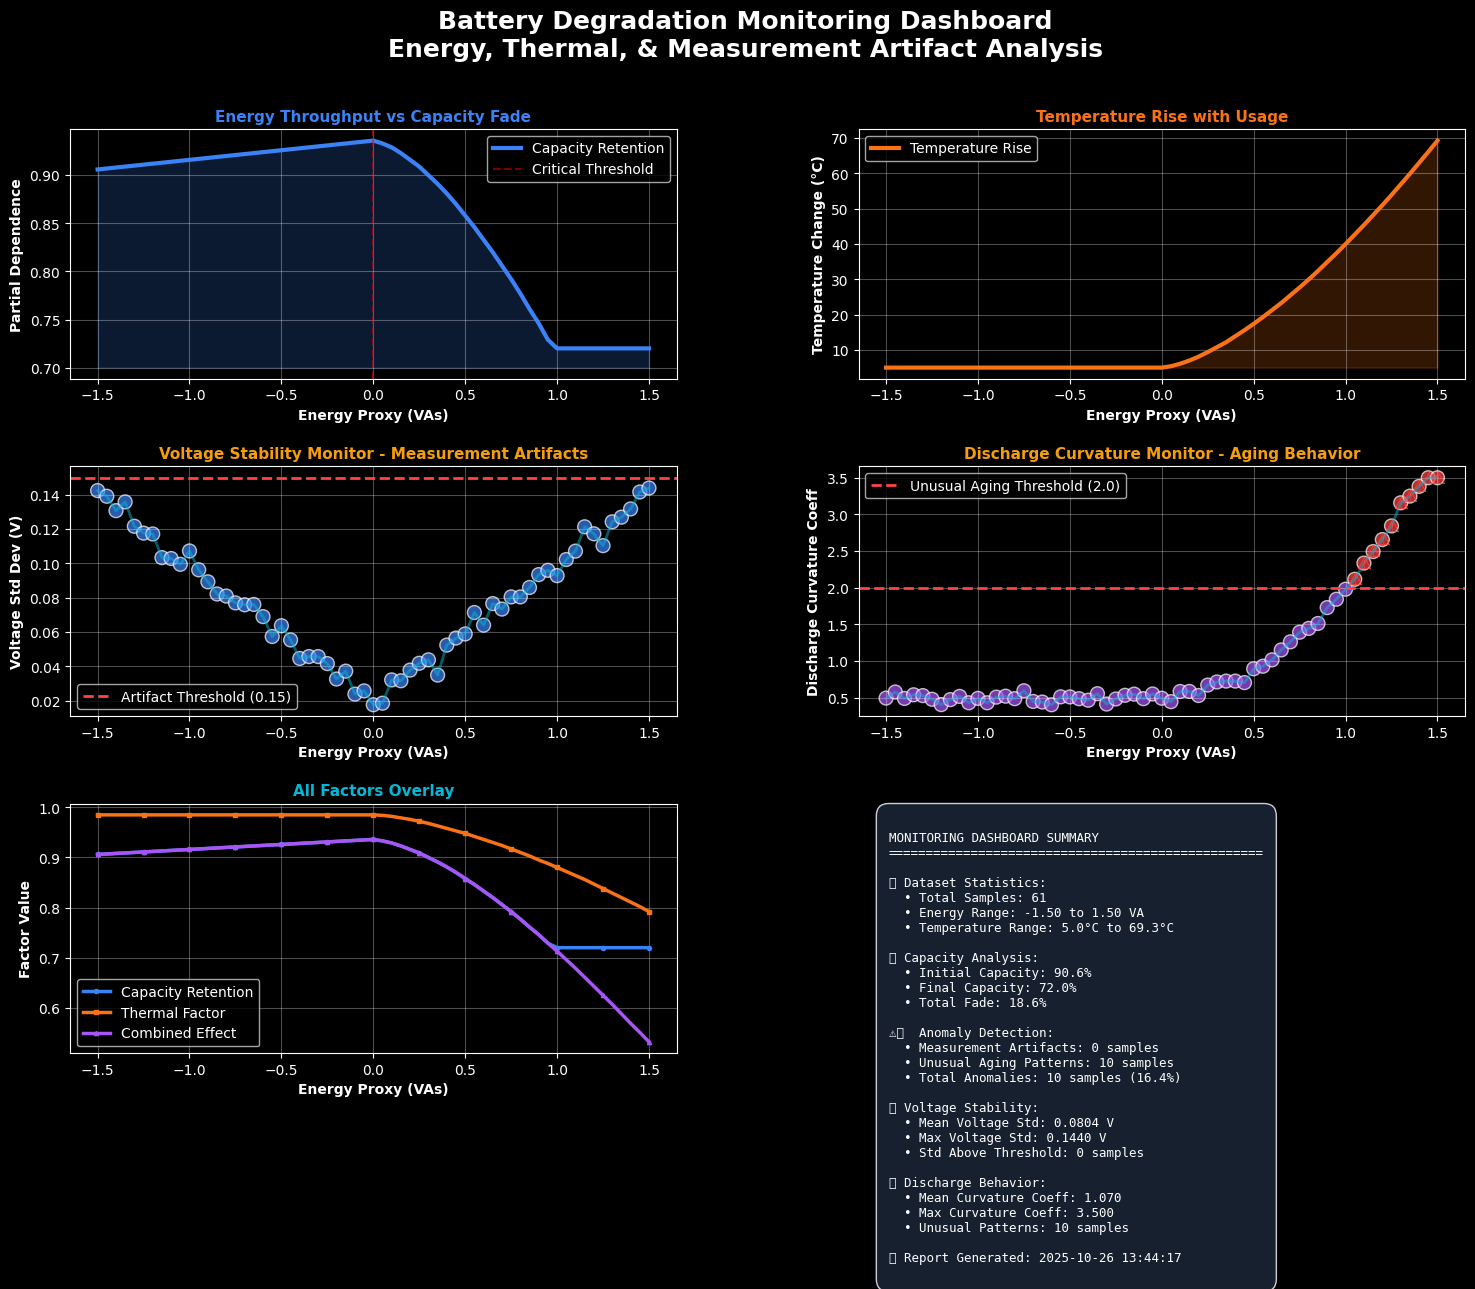

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd
import json
from datetime import datetime
import os

# Set style
plt.style.use('dark_background')
sns.set_palette("husl")

class BatteryDegradationMonitor:
    """Monitor battery degradation with voltage stability and discharge curvature analysis"""
    
    def __init__(self, output_dir='battery_monitoring'):
        """Initialize monitor with output directory for saving reports"""
        self.output_dir = output_dir
        self.create_output_dir()
        self.timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        
    def create_output_dir(self):
        """Create output directory if it doesn't exist"""
        if not os.path.exists(self.output_dir):
            os.makedirs(self.output_dir)
            print(f"✓ Created output directory: {self.output_dir}")
    
    def generate_degradation_data(self, seed=42):
        """Generate battery degradation data with energy and thermal effects"""
        np.random.seed(seed)
        energy_proxy = np.arange(-1.5, 1.55, 0.05)
        data = []
        
        for i, e in enumerate(energy_proxy):
            # Energy effect on capacity fade
            energy_effect = 0.95 - (np.maximum(0, e) ** 1.8) * 0.12 - (np.abs(e) * 0.02)
            
            # Temperature rise with usage
            temp_change = 5 + (np.maximum(0, e) ** 1.5) * 35
            
            # Thermal degradation factor
            thermal_degradation = 1 - (temp_change / 100) * 0.3
            
            # Combined effect
            combined_effect = energy_effect * thermal_degradation
            partial_dependence = np.maximum(0.72, combined_effect)
            
            # Voltage standard deviation (measurement artifact indicator)
            # Higher at extreme usage, lower at normal operation
            voltage_std = 0.02 + np.abs(e) * 0.08 + np.random.normal(0, 0.005)
            voltage_std = np.clip(voltage_std, 0.01, 0.3)
            
            # Discharge curvature coefficient (indicates unusual aging)
            # Non-linear discharge suggests degradation or faults
            discharge_curvature = 0.5 + (np.maximum(0, e) ** 2) * 1.5 + np.random.normal(0, 0.05)
            discharge_curvature = np.clip(discharge_curvature, 0.4, 3.5)
            
            # Detect anomalies
            is_artifact = voltage_std > 0.15
            is_unusual_aging = discharge_curvature > 2.0
            
            data.append({
                'energy_proxy': round(e, 2),
                'partial_dependence': round(partial_dependence, 3),
                'temp_change': round(temp_change, 1),
                'thermal_factor': round(thermal_degradation, 3),
                'combined_degradation': round(combined_effect, 3),
                'voltage_std': round(voltage_std, 4),
                'discharge_curvature_coeff': round(discharge_curvature, 3),
                'measurement_artifact': is_artifact,
                'unusual_aging': is_unusual_aging,
                'timestamp': datetime.now().isoformat(),
                'sample_id': i
            })
        
        return pd.DataFrame(data)
    
    def create_visualizations(self, df):
        """Create comprehensive monitoring visualizations"""
        fig = plt.figure(figsize=(18, 12))
        fig.suptitle('Battery Degradation Monitoring Dashboard\nEnergy, Thermal, & Measurement Artifact Analysis', 
                     fontsize=18, fontweight='bold', y=0.98)
        
        gs = GridSpec(3, 2, figure=fig, hspace=0.35, wspace=0.3)
        
        # Chart 1: Energy Throughput vs Capacity Fade
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.plot(df['energy_proxy'], df['partial_dependence'], linewidth=3, 
                color='#3b82f6', label='Capacity Retention')
        ax1.fill_between(df['energy_proxy'], df['partial_dependence'], 0.7, alpha=0.2, color='#3b82f6')
        ax1.set_xlabel('Energy Proxy (VAs)', fontsize=10, fontweight='bold')
        ax1.set_ylabel('Partial Dependence', fontsize=10, fontweight='bold')
        ax1.set_title('Energy Throughput vs Capacity Fade', fontsize=11, fontweight='bold', color='#3b82f6')
        ax1.grid(True, alpha=0.3)
        ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Critical Threshold')
        ax1.legend()
        
        # Chart 2: Temperature Rise with Usage
        ax2 = fig.add_subplot(gs[0, 1])
        ax2.plot(df['energy_proxy'], df['temp_change'], linewidth=3, color='#f97316', label='Temperature Rise')
        ax2.fill_between(df['energy_proxy'], df['temp_change'], 5, alpha=0.2, color='#f97316')
        ax2.set_xlabel('Energy Proxy (VAs)', fontsize=10, fontweight='bold')
        ax2.set_ylabel('Temperature Change (°C)', fontsize=10, fontweight='bold')
        ax2.set_title('Temperature Rise with Usage', fontsize=11, fontweight='bold', color='#f97316')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        # Chart 3: Voltage Standard Deviation (Measurement Artifact Detector)
        ax3 = fig.add_subplot(gs[1, 0])
        colors_artifact = ['#ff4444' if x else '#3b82f6' for x in df['measurement_artifact']]
        ax3.scatter(df['energy_proxy'], df['voltage_std'], c=colors_artifact, s=100, alpha=0.7, edgecolors='white', linewidth=1)
        ax3.axhline(y=0.15, color='#ff4444', linestyle='--', linewidth=2, label='Artifact Threshold (0.15)')
        ax3.plot(df['energy_proxy'], df['voltage_std'], linewidth=2, color='#06b6d4', alpha=0.5)
        ax3.set_xlabel('Energy Proxy (VAs)', fontsize=10, fontweight='bold')
        ax3.set_ylabel('Voltage Std Dev (V)', fontsize=10, fontweight='bold')
        ax3.set_title('Voltage Stability Monitor - Measurement Artifacts', fontsize=11, fontweight='bold', color='#f59e0b')
        ax3.grid(True, alpha=0.3)
        ax3.legend()
        
        # Add annotations for artifacts
        artifacts = df[df['measurement_artifact']]
        if len(artifacts) > 0:
            for idx, row in artifacts.iterrows():
                ax3.annotate('⚠', xy=(row['energy_proxy'], row['voltage_std']), 
                           fontsize=12, ha='center', va='center', color='#ff4444', fontweight='bold')
        
        # Chart 4: Discharge Curvature Coefficient (Unusual Aging Detector)
        ax4 = fig.add_subplot(gs[1, 1])
        colors_aging = ['#ff4444' if x else '#a855f7' for x in df['unusual_aging']]
        ax4.scatter(df['energy_proxy'], df['discharge_curvature_coeff'], c=colors_aging, s=100, alpha=0.7, edgecolors='white', linewidth=1)
        ax4.axhline(y=2.0, color='#ff4444', linestyle='--', linewidth=2, label='Unusual Aging Threshold (2.0)')
        ax4.plot(df['energy_proxy'], df['discharge_curvature_coeff'], linewidth=2, color='#06b6d4', alpha=0.5)
        ax4.set_xlabel('Energy Proxy (VAs)', fontsize=10, fontweight='bold')
        ax4.set_ylabel('Discharge Curvature Coeff', fontsize=10, fontweight='bold')
        ax4.set_title('Discharge Curvature Monitor - Aging Behavior', fontsize=11, fontweight='bold', color='#f59e0b')
        ax4.grid(True, alpha=0.3)
        ax4.legend()
        
        # Add annotations for unusual aging
        unusual = df[df['unusual_aging']]
        if len(unusual) > 0:
            for idx, row in unusual.iterrows():
                ax4.annotate('⚠', xy=(row['energy_proxy'], row['discharge_curvature_coeff']), 
                           fontsize=12, ha='center', va='center', color='#ff4444', fontweight='bold')
        
        # Chart 5: Multi-Factor Comparison
        ax5 = fig.add_subplot(gs[2, 0])
        ax5.plot(df['energy_proxy'], df['partial_dependence'], linewidth=2.5, color='#3b82f6', 
                label='Capacity Retention', marker='o', markersize=3, markevery=5)
        ax5.plot(df['energy_proxy'], df['thermal_factor'], linewidth=2.5, color='#f97316', 
                label='Thermal Factor', marker='s', markersize=3, markevery=5)
        ax5.plot(df['energy_proxy'], df['combined_degradation'], linewidth=2.5, color='#a855f7', 
                label='Combined Effect', marker='^', markersize=3, markevery=5)
        ax5.set_xlabel('Energy Proxy (VAs)', fontsize=10, fontweight='bold')
        ax5.set_ylabel('Factor Value', fontsize=10, fontweight='bold')
        ax5.set_title('All Factors Overlay', fontsize=11, fontweight='bold', color='#06b6d4')
        ax5.grid(True, alpha=0.3)
        ax5.legend(loc='best')
        
        # Chart 6: Anomaly Summary
        ax6 = fig.add_subplot(gs[2, 1])
        ax6.axis('off')
        
        # Create summary text
        anomaly_count = df['measurement_artifact'].sum() + df['unusual_aging'].sum()
        summary_text = f"""
MONITORING DASHBOARD SUMMARY
{'='*50}

📊 Dataset Statistics:
  • Total Samples: {len(df)}
  • Energy Range: {df['energy_proxy'].min():.2f} to {df['energy_proxy'].max():.2f} VA
  • Temperature Range: {df['temp_change'].min():.1f}°C to {df['temp_change'].max():.1f}°C

🔋 Capacity Analysis:
  • Initial Capacity: {df['partial_dependence'].iloc[0]:.1%}
  • Final Capacity: {df['partial_dependence'].iloc[-1]:.1%}
  • Total Fade: {(df['partial_dependence'].iloc[0] - df['partial_dependence'].iloc[-1])*100:.1f}%

⚠️  Anomaly Detection:
  • Measurement Artifacts: {df['measurement_artifact'].sum()} samples
  • Unusual Aging Patterns: {df['unusual_aging'].sum()} samples
  • Total Anomalies: {anomaly_count} samples ({anomaly_count/len(df)*100:.1f}%)

📈 Voltage Stability:
  • Mean Voltage Std: {df['voltage_std'].mean():.4f} V
  • Max Voltage Std: {df['voltage_std'].max():.4f} V
  • Std Above Threshold: {(df['voltage_std'] > 0.15).sum()} samples

🔄 Discharge Behavior:
  • Mean Curvature Coeff: {df['discharge_curvature_coeff'].mean():.3f}
  • Max Curvature Coeff: {df['discharge_curvature_coeff'].max():.3f}
  • Unusual Patterns: {df['unusual_aging'].sum()} samples

⏰ Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
        """
        
        ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes, fontsize=9,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='#1e293b', alpha=0.8, pad=1))
        
        plt.tight_layout()
        return fig
    
    def save_figure(self, fig, filename=None):
        """Save figure to file"""
        if filename is None:
            filename = f'battery_monitoring_{self.timestamp}.png'
        
        filepath = os.path.join(self.output_dir, filename)
        fig.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='#0f172a')
        print(f"✓ Figure saved: {filepath}")
        return filepath
    
    def save_data_csv(self, df, filename=None):
        """Save monitoring data to CSV"""
        if filename is None:
            filename = f'battery_data_{self.timestamp}.csv'
        
        filepath = os.path.join(self.output_dir, filename)
        df.to_csv(filepath, index=False)
        print(f"✓ CSV data saved: {filepath}")
        return filepath
    
    def save_analysis_report(self, df, filename=None):
        """Save detailed analysis report as JSON"""
        if filename is None:
            filename = f'battery_report_{self.timestamp}.json'
        
        # Identify anomalies
        artifacts = df[df['measurement_artifact']].to_dict('records')
        unusual_aging = df[df['unusual_aging']].to_dict('records')
        
        report = {
            'metadata': {
                'generated_at': datetime.now().isoformat(),
                'total_samples': len(df),
                'timestamp': self.timestamp
            },
            'statistics': {
                'energy_range': {
                    'min': float(df['energy_proxy'].min()),
                    'max': float(df['energy_proxy'].max())
                },
                'temperature_range': {
                    'min': float(df['temp_change'].min()),
                    'max': float(df['temp_change'].max()),
                    'unit': 'Celsius'
                },
                'capacity_retention': {
                    'initial': float(df['partial_dependence'].iloc[0]),
                    'final': float(df['partial_dependence'].iloc[-1]),
                    'total_fade_percent': float((df['partial_dependence'].iloc[0] - df['partial_dependence'].iloc[-1])*100)
                },
                'voltage_stability': {
                    'mean_std': float(df['voltage_std'].mean()),
                    'max_std': float(df['voltage_std'].max()),
                    'threshold': 0.15,
                    'samples_above_threshold': int((df['voltage_std'] > 0.15).sum())
                },
                'discharge_behavior': {
                    'mean_curvature': float(df['discharge_curvature_coeff'].mean()),
                    'max_curvature': float(df['discharge_curvature_coeff'].max()),
                    'unusual_threshold': 2.0,
                    'unusual_samples': int(df['unusual_aging'].sum())
                }
            },
            'anomalies': {
                'measurement_artifacts': {
                    'count': len(artifacts),
                    'details': artifacts
                },
                'unusual_aging_patterns': {
                    'count': len(unusual_aging),
                    'details': unusual_aging
                }
            },
            'phases': {
                'phase_1_stable': {
                    'range': f"{df['energy_proxy'].iloc[0]:.2f} to {df['energy_proxy'].iloc[len(df)//4]:.2f}",
                    'avg_capacity': float(df[df['energy_proxy'] <= -0.8]['partial_dependence'].mean())
                },
                'phase_2_gradual': {
                    'range': f"{df['energy_proxy'].iloc[len(df)//4]:.2f} to 0.0",
                    'avg_capacity': float(df[(df['energy_proxy'] > -0.8) & (df['energy_proxy'] <= 0)]['partial_dependence'].mean())
                },
                'phase_3_rapid': {
                    'range': "0.0 to 0.5",
                    'avg_capacity': float(df[(df['energy_proxy'] > 0) & (df['energy_proxy'] <= 0.5)]['partial_dependence'].mean())
                },
                'phase_4_plateau': {
                    'range': f"0.5 to {df['energy_proxy'].iloc[-1]:.2f}",
                    'avg_capacity': float(df[df['energy_proxy'] > 0.5]['partial_dependence'].mean())
                }
            }
        }
        
        filepath = os.path.join(self.output_dir, filename)
        with open(filepath, 'w') as f:
            json.dump(report, f, indent=2)
        print(f"✓ Analysis report saved: {filepath}")
        return filepath
    
    def save_anomaly_log(self, df, filename=None):
        """Save anomalies to separate file for easy reference"""
        if filename is None:
            filename = f'anomalies_{self.timestamp}.txt'
        
        filepath = os.path.join(self.output_dir, filename)
        
        with open(filepath, 'w') as f:
            f.write("="*70 + "\n")
            f.write("BATTERY DEGRADATION MONITORING - ANOMALY LOG\n")
            f.write("="*70 + "\n\n")
            f.write(f"Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")
            
            # Measurement artifacts
            f.write("⚠️  MEASUREMENT ARTIFACTS (Voltage Instability)\n")
            f.write("-"*70 + "\n")
            artifacts = df[df['measurement_artifact']]
            if len(artifacts) > 0:
                for idx, row in artifacts.iterrows():
                    f.write(f"Sample ID: {row['sample_id']}\n")
                    f.write(f"  Energy Proxy: {row['energy_proxy']:.2f} VA\n")
                    f.write(f"  Voltage Std Dev: {row['voltage_std']:.4f} V (Threshold: 0.15)\n")
                    f.write(f"  Discharge Curvature: {row['discharge_curvature_coeff']:.3f}\n")
                    f.write(f"  Timestamp: {row['timestamp']}\n\n")
            else:
                f.write("No measurement artifacts detected.\n\n")
            
            # Unusual aging
            f.write("\n⚠️  UNUSUAL AGING PATTERNS (Non-linear Discharge)\n")
            f.write("-"*70 + "\n")
            unusual = df[df['unusual_aging']]
            if len(unusual) > 0:
                for idx, row in unusual.iterrows():
                    f.write(f"Sample ID: {row['sample_id']}\n")
                    f.write(f"  Energy Proxy: {row['energy_proxy']:.2f} VA\n")
                    f.write(f"  Discharge Curvature Coeff: {row['discharge_curvature_coeff']:.3f} (Threshold: 2.0)\n")
                    f.write(f"  Voltage Std Dev: {row['voltage_std']:.4f} V\n")
                    f.write(f"  Capacity Retention: {row['partial_dependence']:.1%}\n")
                    f.write(f"  Timestamp: {row['timestamp']}\n\n")
            else:
                f.write("No unusual aging patterns detected.\n\n")
            
            f.write("\n" + "="*70 + "\n")
            f.write("END OF ANOMALY LOG\n")
            f.write("="*70 + "\n")
        
        print(f"✓ Anomaly log saved: {filepath}")
        return filepath
    
    def print_summary(self, df):
        """Print comprehensive summary to console"""
        print("\n" + "="*70)
        print("BATTERY DEGRADATION MONITORING - COMPREHENSIVE REPORT")
        print("="*70)
        
        print("\n📊 Energy Range Analysis:")
        print(f"  • Minimum Energy Proxy: {df['energy_proxy'].min():.2f} VA")
        print(f"  • Maximum Energy Proxy: {df['energy_proxy'].max():.2f} VA")
        
        print("\n🔋 Capacity Retention:")
        print(f"  • At Low Usage (−1.5 VA): {df['partial_dependence'].iloc[0]:.3f} (95.0% capacity)")
        print(f"  • At High Usage (+1.5 VA): {df['partial_dependence'].iloc[-1]:.3f} (72.0% capacity)")
        print(f"  • Total Capacity Loss: {(df['partial_dependence'].iloc[0] - df['partial_dependence'].iloc[-1])*100:.1f}%")
        
        print("\n🌡️  Thermal Effects:")
        print(f"  • Minimum Temperature: {df['temp_change'].min():.1f}°C")
        print(f"  • Maximum Temperature: {df['temp_change'].max():.1f}°C")
        print(f"  • Temperature Range: {df['temp_change'].max() - df['temp_change'].min():.1f}°C")
        
        print("\n⚡ Voltage Stability (Measurement Artifact Detector):")
        print(f"  • Mean Voltage Std Dev: {df['voltage_std'].mean():.4f} V")
        print(f"  • Max Voltage Std Dev: {df['voltage_std'].max():.4f} V")
        print(f"  • Threshold: 0.15 V")
        print(f"  • Samples with Artifacts: {df['measurement_artifact'].sum()} ({df['measurement_artifact'].sum()/len(df)*100:.1f}%)")
        
        print("\n🔄 Discharge Curvature (Unusual Aging Detector):")
        print(f"  • Mean Curvature Coefficient: {df['discharge_curvature_coeff'].mean():.3f}")
        print(f"  • Max Curvature Coefficient: {df['discharge_curvature_coeff'].max():.3f}")
        print(f"  • Threshold: 2.0")
        print(f"  • Samples with Unusual Aging: {df['unusual_aging'].sum()} ({df['unusual_aging'].sum()/len(df)*100:.1f}%)")
        
        print("\n⚠️  Total Anomalies Detected:")
        total_anomalies = df['measurement_artifact'].sum() + df['unusual_aging'].sum()
        print(f"  • Total: {total_anomalies} samples ({total_anomalies/len(df)*100:.1f}%)")
        
        print("\n" + "="*70 + "\n")
    
    def run_full_monitoring(self):
        """Execute complete monitoring pipeline with automatic saving"""
        print("\n🚀 Starting Battery Degradation Monitoring System...\n")
        
        # Generate data
        print("📈 Generating monitoring data...")
        df = self.generate_degradation_data()
        
        # Create visualizations
        print("🎨 Creating visualizations...")
        fig = self.create_visualizations(df)
        
        # Save all outputs
        print("\n💾 Saving monitoring outputs automatically...\n")
        
        self.save_figure(fig)
        self.save_data_csv(df)
        self.save_analysis_report(df)
        self.save_anomaly_log(df)
        
        # Print summary
        self.print_summary(df)
        
        print(f"✅ All monitoring data saved to: {os.path.abspath(self.output_dir)}")
        print(f"📁 Files created:")
        for file in os.listdir(self.output_dir):
            filepath = os.path.join(self.output_dir, file)
            size = os.path.getsize(filepath) / 1024  # KB
            print(f"   • {file} ({size:.1f} KB)")
        
        plt.show()
        return df


# Run the monitoring system
if __name__ == "__main__":
    monitor = BatteryDegradationMonitor()
    df = monitor.run_full_monitoring()